In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', 50)

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
client_df = pd.read_csv('client_data.csv')
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [3]:
price_df = pd.read_csv('price_data.csv')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [4]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [6]:
#Check dimensions of the datasets

print("Rows and Columns in Client Data : ", client_df.shape)
print("Rows and Columns in Price Data : ", price_df.shape)

Rows and Columns in Client Data :  (14606, 26)
Rows and Columns in Price Data :  (193002, 8)


Check if the date type of the features are correctly recognised

In [7]:
# Method to check date type features

def check_date_type(dataframe, columns):
    for column in columns:
        if pd.api.types.is_datetime64_any_dtype(dataframe[column]):
            print(f"The column '{column}' is of date type.")
            #return True
        else:
          print(f"The column '{column}' is NOT of date type.")


In [8]:
client_date_columns = ['date_activ','date_end','date_modif_prod','date_renewal']
check_date_type(client_df, client_date_columns)

The column 'date_activ' is NOT of date type.
The column 'date_end' is NOT of date type.
The column 'date_modif_prod' is NOT of date type.
The column 'date_renewal' is NOT of date type.


In [9]:
cols = ['date_activ','date_end','date_modif_prod','date_renewal']
for col in cols:
  client_df[col] = pd.to_datetime(client_df[col])


In [10]:
client_date_columns = ['date_activ','date_end','date_modif_prod','date_renewal']
check_date_type(client_df, client_date_columns)

The column 'date_activ' is of date type.
The column 'date_end' is of date type.
The column 'date_modif_prod' is of date type.
The column 'date_renewal' is of date type.


In [11]:
check_date_type(price_df, ['price_date'])

The column 'price_date' is NOT of date type.


In [12]:
# Since the feature is not recognised as a date type, convert the feature to appropriate date type

price_df['price_date'] = pd.to_datetime(price_df['price_date'])
check_date_type(price_df, ['price_date'])

The column 'price_date' is of date type.


In [13]:
def convert_boolean_columns(dataframe):
    for column in dataframe.columns:
        if all(value in [0, 1] for value in dataframe[column]) and dataframe[column].dtype == 'int64':
            dataframe[column] = dataframe[column].map({1: True, 0: False})
        elif all(value in ['t', 'f'] for value in dataframe[column]):
          dataframe[column] = dataframe[column].map({'t': True, 'f': False})
    return dataframe

# Example usage:
client_df = convert_boolean_columns(client_df)
price_df = convert_boolean_columns(price_df)

In [14]:
def get_boolean_categorical_columns(dataframe):
    boolean_categorical_columns = []
    for column in dataframe.columns:
        if dataframe[column].dtype == 'bool' and set(dataframe[column].unique()) == {True, False}:
            boolean_categorical_columns.append(column)
    return boolean_categorical_columns

# Example usage:
boolean_categorical_columns = get_boolean_categorical_columns(client_df)
print("Categorical columns in Client dataset: ", get_boolean_categorical_columns(client_df))
print("Categorical columns in Price dataset: ", get_boolean_categorical_columns(price_df))

Categorical columns in Client dataset:  ['has_gas', 'churn']
Categorical columns in Price dataset:  []


In [15]:
# Function to check missing values

def remove_records_with_missing(dataset):
    # Check for missing values or values containing 'MISSING'
    contains_missing = dataset.isna().sum().sum() > 0 or dataset.astype(str).applymap(lambda x: 'MISSING' in x).any().any()

    if not contains_missing:
        print("No missing values found")
        return dataset
    else:
        # Remove records containing missing values
        cleaned_dataset = dataset.dropna()  # Remove records with any missing values
        cleaned_dataset = cleaned_dataset[~cleaned_dataset.astype(str).applymap(lambda x: 'MISSING' in x).any(axis=1)]  # Remove records with 'MISSING' values
        print("Missing values removed")
        return cleaned_dataset


In [16]:
client_clean = remove_records_with_missing(client_df)

Missing values removed


In [17]:
price_clean = remove_records_with_missing(price_df)

No missing values found


In [18]:
#Check dimensions of the datasets

print("Rows and Columns in Client Data : ", client_clean.shape)
print("Rows and Columns in Price Data : ", price_clean.shape)

Rows and Columns in Client Data :  (10831, 26)
Rows and Columns in Price Data :  (193002, 8)


Since the values for "channel_sales" and "origin_up" are not understandable, let's convert these features to numeric type using Label Encoding

In [19]:
# Label Encoding on client dataset

from sklearn.preprocessing import LabelEncoder
channel_encoder = LabelEncoder()
client_clean['channel_sales'] = channel_encoder.fit_transform(client_clean['channel_sales'])
origin_encoder = LabelEncoder()
client_clean['origin_up'] = origin_encoder.fit_transform(client_clean['origin_up'])

In [20]:
client_clean.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,True,0.00,25.44,25.44,2,678.99,3,2,43.648,True
2,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,False,0.00,28.60,28.60,1,6.60,6,0,13.856,False
3,bba03439a292a1e166f80264c16191cb,4,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,False,0.00,30.22,30.22,1,25.46,6,0,13.200,False
5,1aa498825382410b098937d65c4ec26d,6,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,False,181.21,33.12,33.12,1,118.89,4,2,13.200,True
6,7ab4bf4878d8f7661dfc20e9b8e18011,3,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,False,0.00,4.04,4.04,1,346.63,4,2,15.000,True


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_columns(dataframe):
    categorical_columns = []
    for column in dataframe.columns:
        if dataframe[column].dtype == 'bool':
            categorical_columns.append(column)

    for column in categorical_columns:
        if len(dataframe[column].unique()) <= 10:  # Only plot if unique values are less than or equal to 10
            plt.figure(figsize=(8, 6))
            sns.countplot(data=dataframe, x=column, palette='Set3', hue='churn', legend=False)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

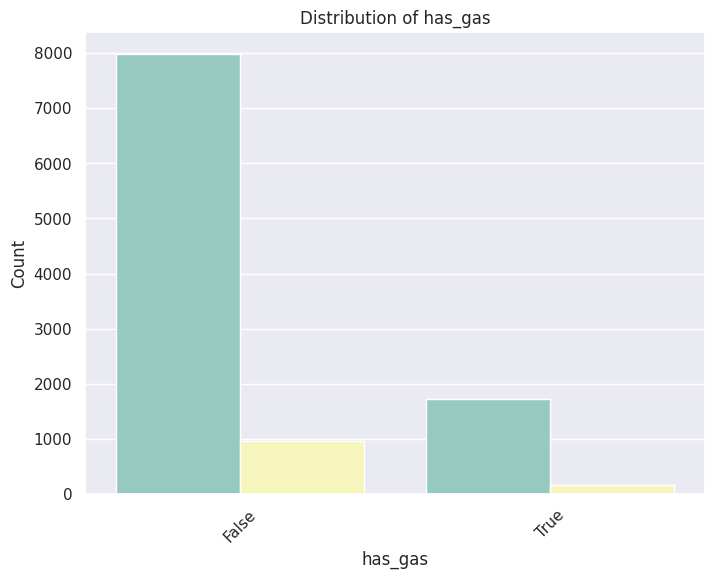

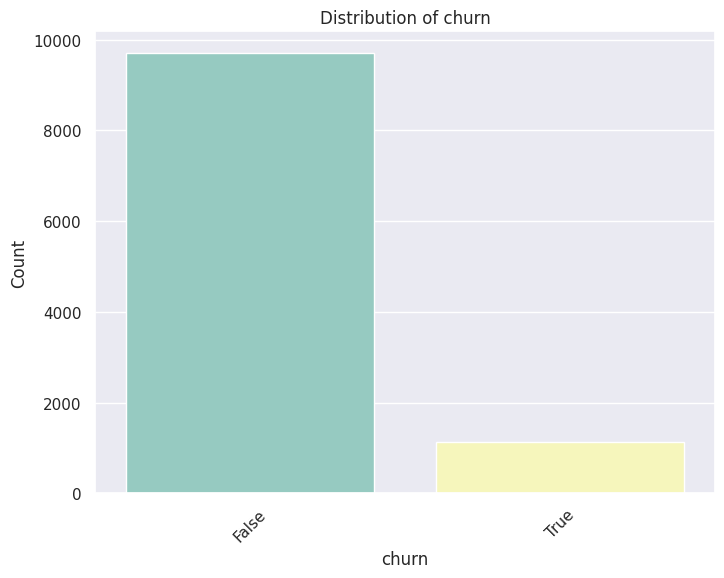

In [22]:
plot_categorical_columns(client_clean)

In [23]:
# Method to identify numeric features from the dataset

def describe_numeric(dataset):
    # Identify integer numeric columns
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # Identify float numeric columns
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()

    # Check if there are any numeric columns
    if len(int_columns) + len(float_columns) != 0:
        # Display numeric variables
        print('Numeric variables are', int_columns + float_columns, '\n' + '=='*40)

        # Describe integer numeric features
        if len(int_columns) != 0:
            for cat in int_columns:
                # Calculate value counts and proportion for discrete numeric columns
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count'] / len(dataset)
                # Display value counts and proportion of a categorical feature
                print(describe_frame, '\n' + '--'*40)

        # Describe float numeric features
        # Display min, max, mean, median for continuous numeric columns
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n' + '--'*40)
    else:
        # If no numeric variables found in the dataset
        print('There are no numeric variables in the dataset')


In [24]:
describe_numeric(client_clean)

Numeric variables are ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig', 'origin_up', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'] 
   channel_sales  count  proportion
0              3   6722    0.620626
1              4   1836    0.169513
2              6   1369    0.126396
3              1    888    0.081987
4              5     11    0.001016
5              0      3    0.000277
6              2      2    0.000185 
--------------------------------------------------------------------------------
      cons_12m  count  proportion
0            0     53    0.004893
1      3329244     23    0.002124
2      1743025     18    0.001662
3      3926060     18    0.001662
4      6207104     18    0.001662
...        ... 

In [25]:
describe_numeric(price_clean)

Numeric variables are ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'] 
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000 
--------------------------------------------------------------------------------


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stacked_bar_chart(df, x_variable, hue_variable, figsize=(10, 6)):
    """
    Plot a stacked bar chart for bivariate analysis.

    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        x_variable (str): The variable to be plotted on the x-axis.
        hue_variable (str): The variable to be used for color differentiation (stacking).
        figsize (tuple): Figure size (width, height) in inches (default is (10, 6)).

    Returns:
        None (displays the plot)
    """
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=x_variable, hue=hue_variable, palette='Set3')
    plt.title(f'Stacked Bar Chart for {x_variable} by {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')
    plt.xticks(rotation=45)
    plt.show()


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stacked_bar_chart(df, x_variable, hue_variable, figsize=(10, 6)):
    """
    Plot a stacked bar chart for bivariate analysis with percentage labels.

    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        x_variable (str): The variable to be plotted on the x-axis.
        hue_variable (str): The variable to be used for color differentiation (stacking).
        figsize (tuple): Figure size (width, height) in inches (default is (10, 6)).

    Returns:
        None (displays the plot)
    """
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=x_variable, hue=hue_variable, palette='Set3')
    plt.title(f'Stacked Bar Chart for {x_variable} by {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')

    # Add percentage labels for each stack
    total_counts = len(df)
    for p in plt.gca().patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        percentage = f'{100 * y / total_counts:.1f}%'
        plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.show()


In [28]:
# Fucntion to plot bar chart with percent labels

def plot_bars(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    """
    Plot a bar chart with percentage labels on top of each bar.

    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        target_variable (str): The name of the column in the DataFrame to be plotted.
        if_sort (bool): Whether to sort the bars by percentage (default is False).
        gap_label_bar (float): The gap between the bar and the label (default is 0).
        figsize (tuple): Figure size (width, height) in inches (default is (9, 6)).

    Returns:
        None (displays the plot)
    """
    # Prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count'] / plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)

    # Add label
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height() * 100), xy=(x, y), ha='center')
        ax.margins(y=0.1)

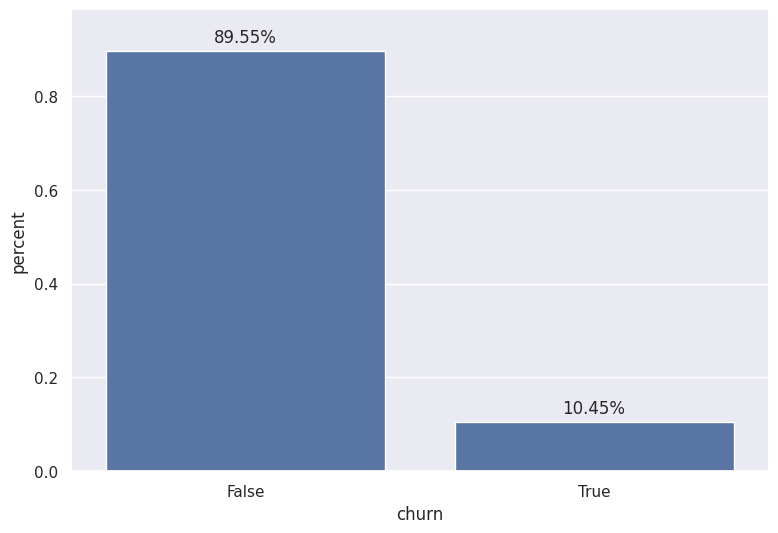

In [29]:
plot_bars(df=client_clean, target_variable='churn', gap_label_bar=0.02)

Within the population being analyzed, the proportion of customers who have churned (i.e., switched to another provider or discontinued their service) is 10.45% of the total customer base.

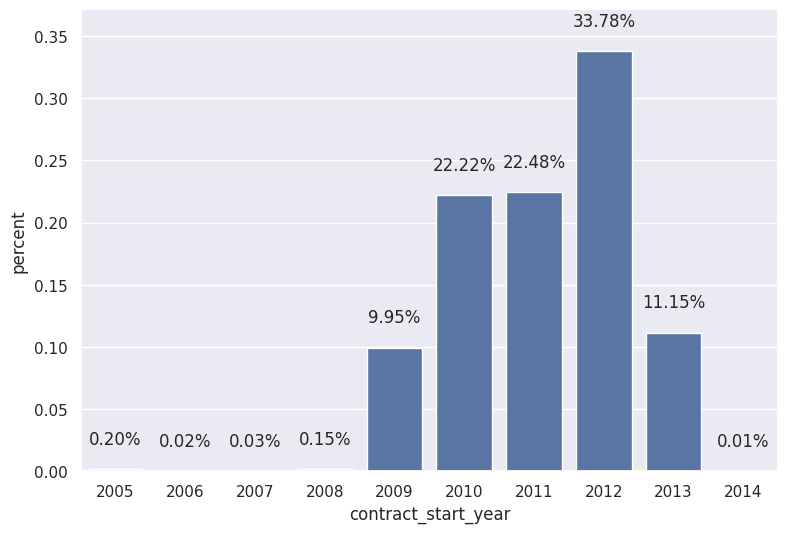

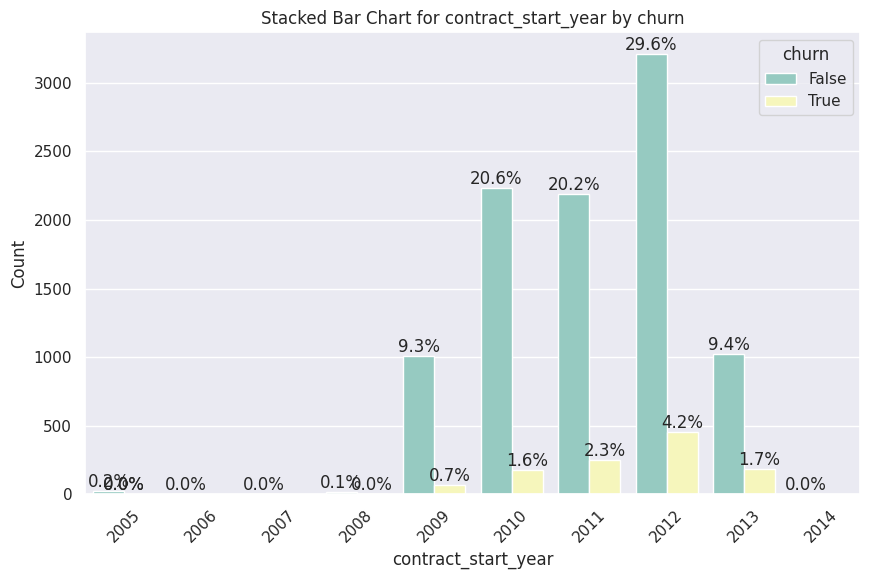

In [30]:
# Extracting the year from the 'date_activ' column and assigning it to a new column 'contract_start_year'
client_clean['contract_start_year'] = client_df['date_activ'].dt.year

# Extracting the year from the 'date_end' column and assigning it to a new column 'contract_end_year'
client_clean['contract_end_year'] = client_df['date_end'].dt.year

# Plotting a bar chart for the distribution of contract start years
plot_bars(df=client_clean, target_variable='contract_start_year', gap_label_bar=0.02)

# Distribution of contract start years segmented by churn status
plot_stacked_bar_chart(df=client_clean, x_variable='contract_start_year', hue_variable='churn')


Based on the observation that most customers started their contracts between 2009 and 2013, we can infer that this period represents a significant portion of the customer base. When we analyze churn behavior within this group, we notice that newer customers, who started their contracts towards the later part of this period (i.e., closer to 2013), are more likely to switch to other providers.

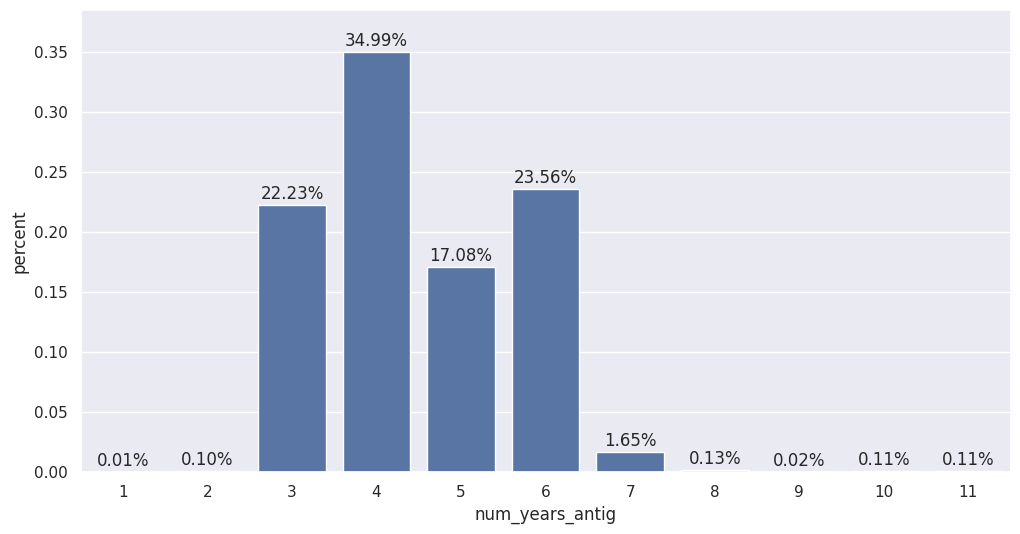

In [31]:
# Bars representing the % of customers based on the antiquity

plot_bars(df=client_clean, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005, figsize=(12,6))


Newer customers, typically those who have been with their current providers for 3 to 6 years, are displaying a higher tendency to switch to other providers. This suggests that despite their relatively short tenure, these customers are more inclined to discontinue their services compared to those who have been with their providers for longer periods.

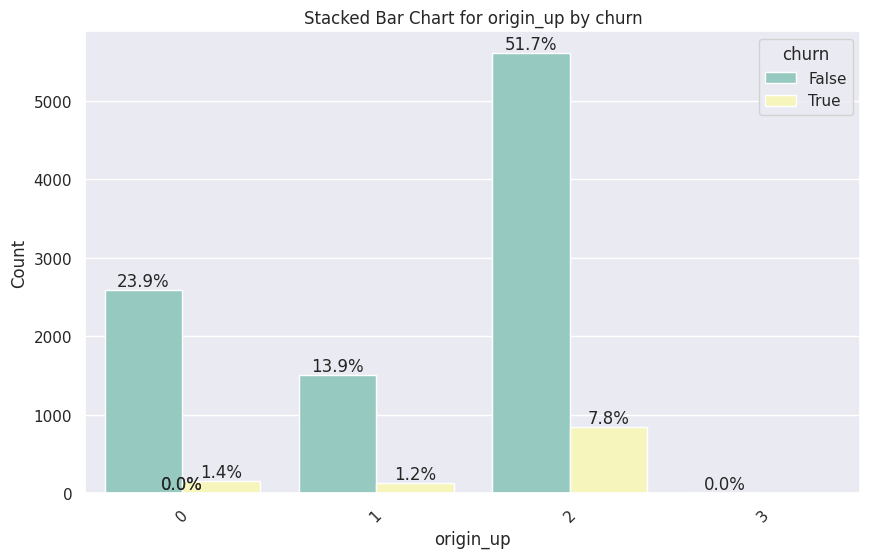

In [32]:
#  Bar chart visualizing the distribution of churn across different origin electricity campaigns

plot_stacked_bar_chart(df=client_clean, x_variable='origin_up', hue_variable='churn')

Campaign 2, which represents the electricity campaign that customers initially subscribed to, exhibits a notably higher number of customers compared to other campaigns. Consequently, it also demonstrates a relatively higher churn rate compared to other campaigns.

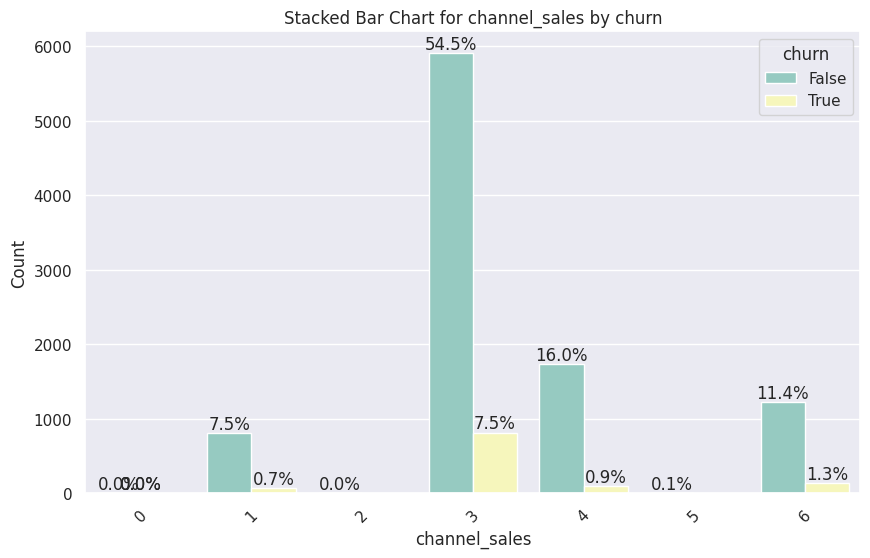

In [33]:
# Bar chart visualising the distribution of churn across different channels of sales

plot_stacked_bar_chart(df=client_clean, x_variable='channel_sales', hue_variable='churn')

The provided chart illustrates that among all the channels, channel 3 experienced the highest sales volume, consequently resulting in the highest churn rate.

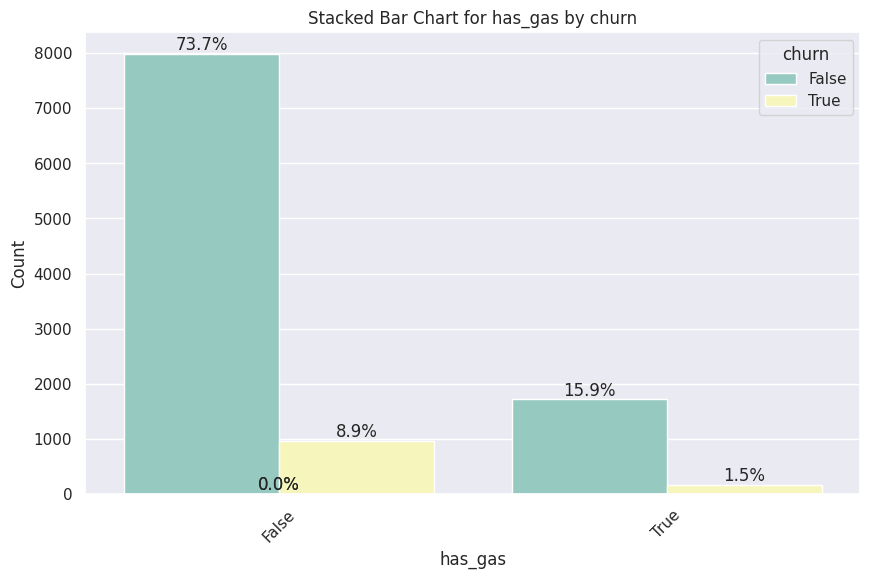

In [34]:
# Bar chart visualising the distribution of customers based on whether they have a gas subscription (has_gas) and their churn status

plot_stacked_bar_chart(df=client_clean, x_variable='has_gas', hue_variable='churn')

This illustration implies that customers who solely subscribe to electricity services are more prone to switching providers compared to those who subscribe to both electricity and gas services.

In [35]:
# Function to plot histograms the distribution of continous numeric features

def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

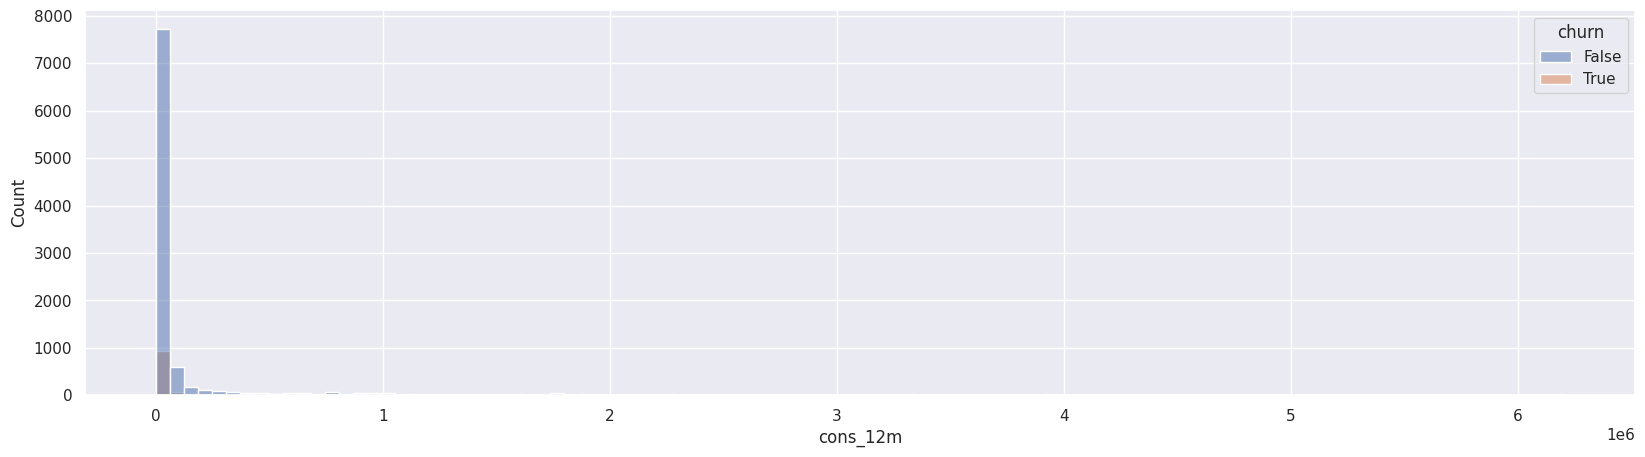

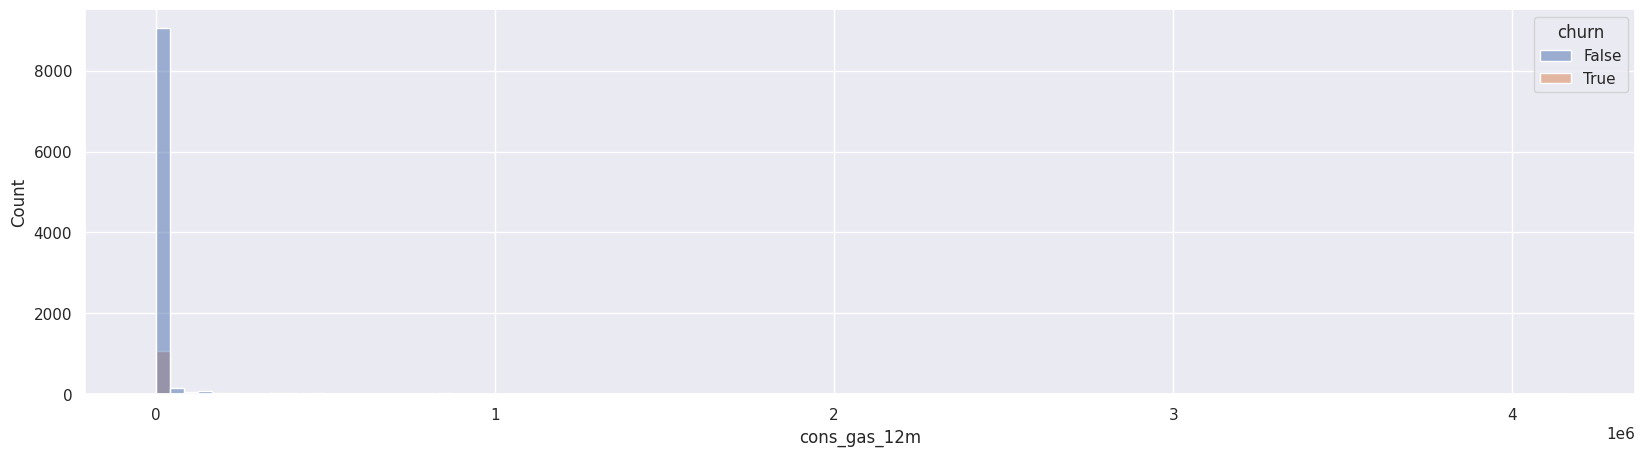

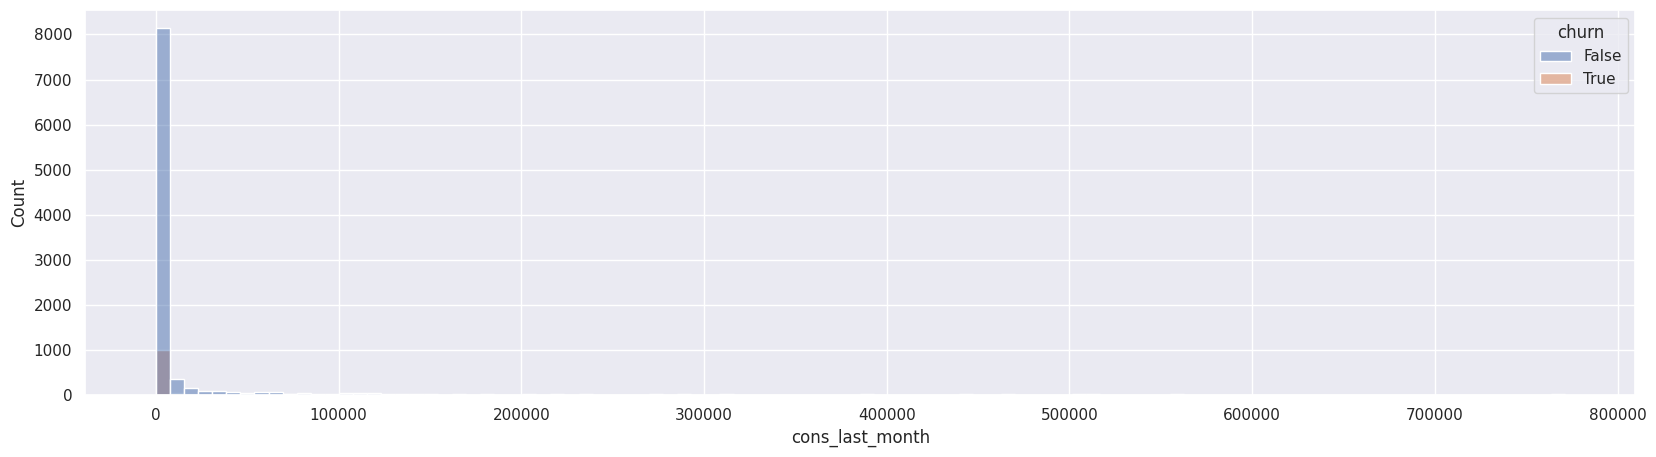

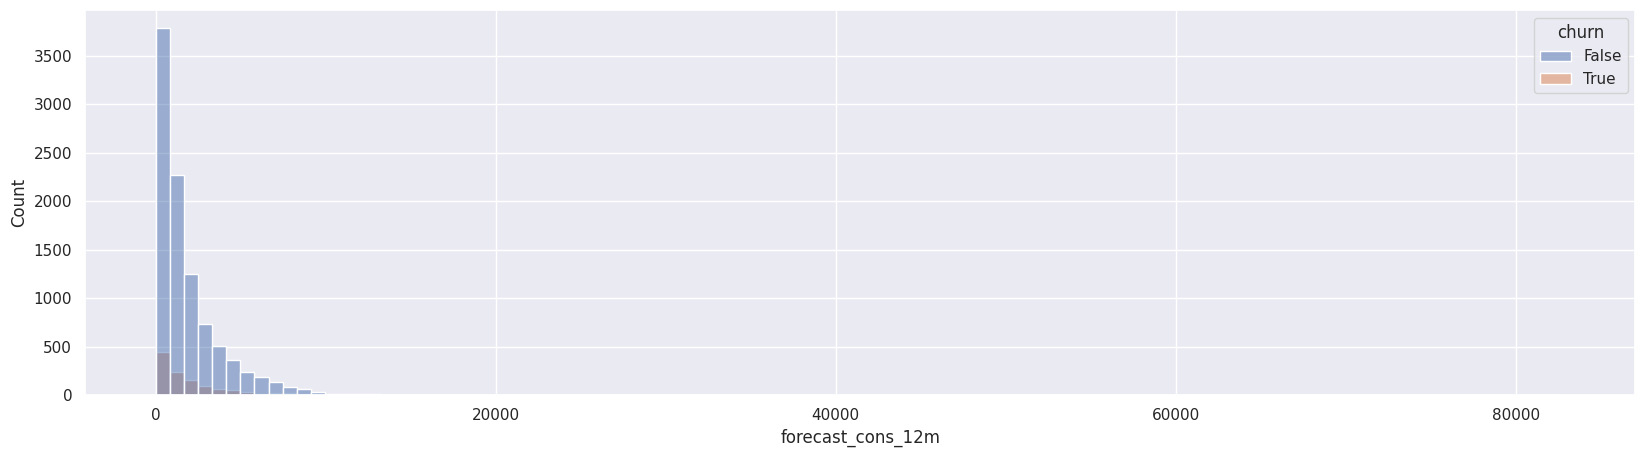

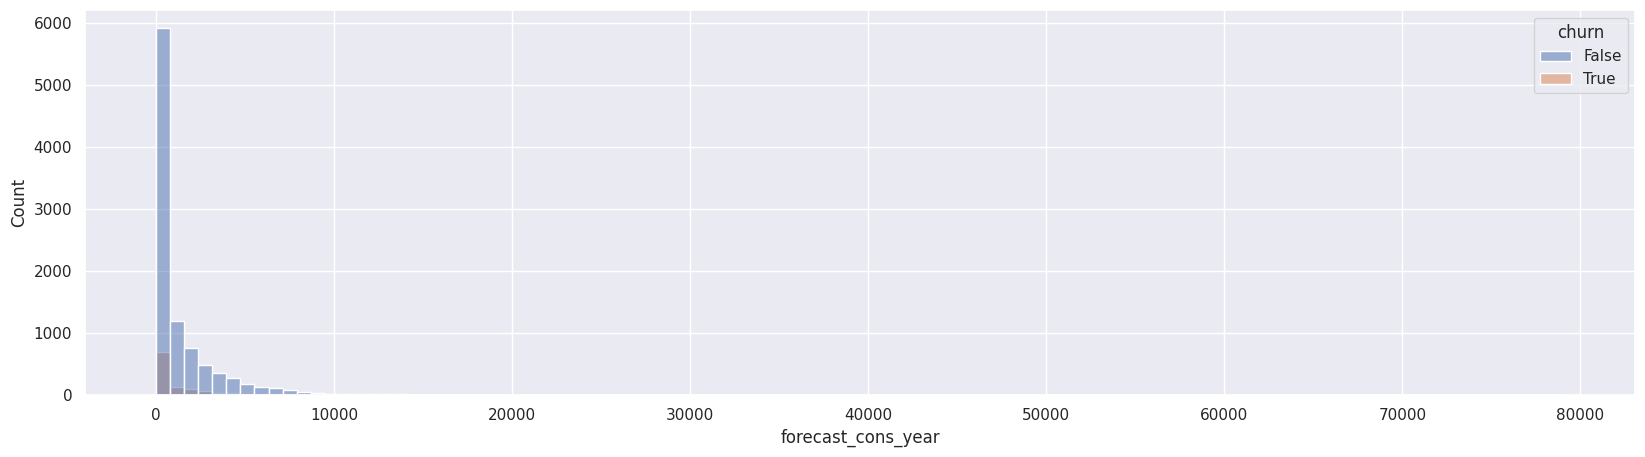

In [36]:
# Histograms for energy consumption features

for attr in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram_by_churn(df=client_clean, target_variable=attr)

 The histograms of energy consumption features exhibit distributions with long tails, indicating the presence of outliers in the data. This suggests that there are relatively fewer instances of very high energy consumption or forecasted consumption, compared to the more frequent lower consumption values.

Now let's analyse the price data.

In [37]:
price_clean.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [38]:
price_clean['id'].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

This analysis indicates that the dataset contains varying numbers of price records for different customers. The majority of customers have a complete set of 12 price records, suggesting a consistent pattern. This observation highlights the variability in the number of price records across customers, with most having a complete set and only a few having incomplete records.

In [39]:
price_clean['price_date'].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

Building upon the previous observation, it appears that the majority of customers have complete 12-month price records, indicating a consistent history of pricing data. Additionally, the presence of last-month's records for every customer (as of 2015-12-01) is advantageous for analyzing price sensitivity. This comprehensive dataset enables a more accurate assessment of customer behavior and preferences regarding pricing changes.

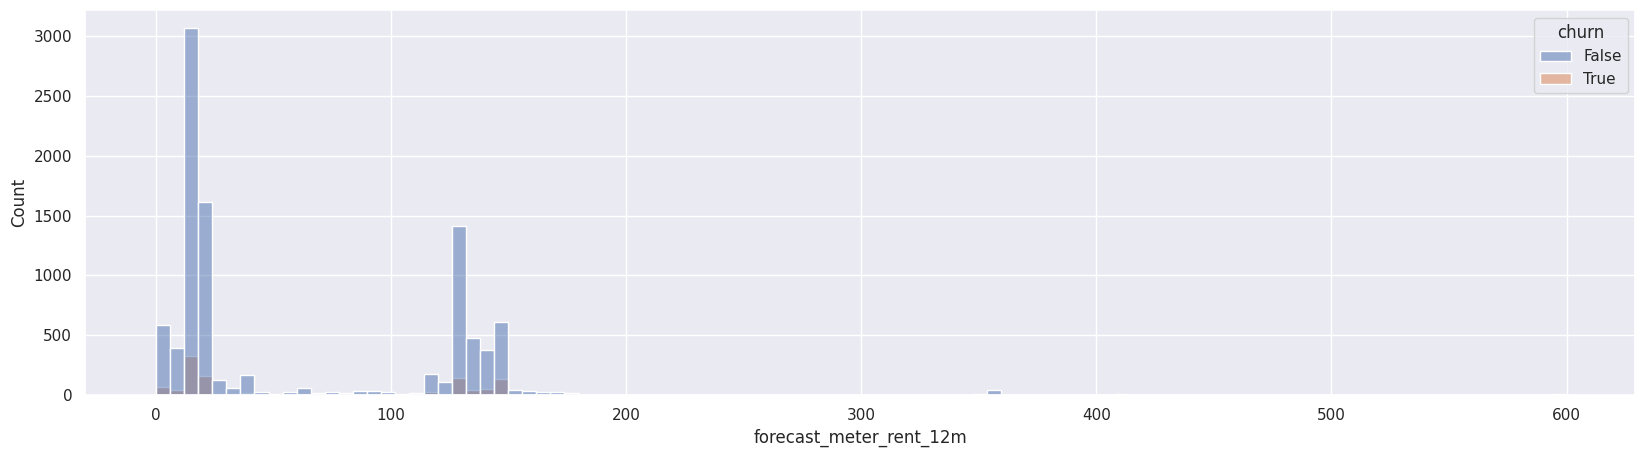

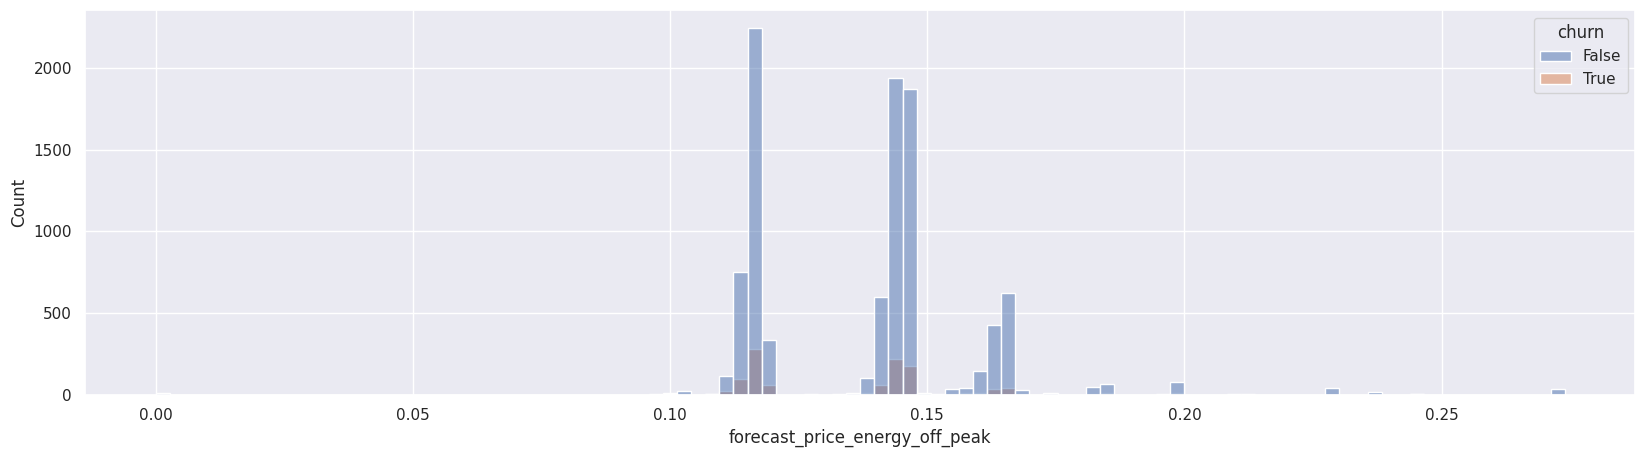

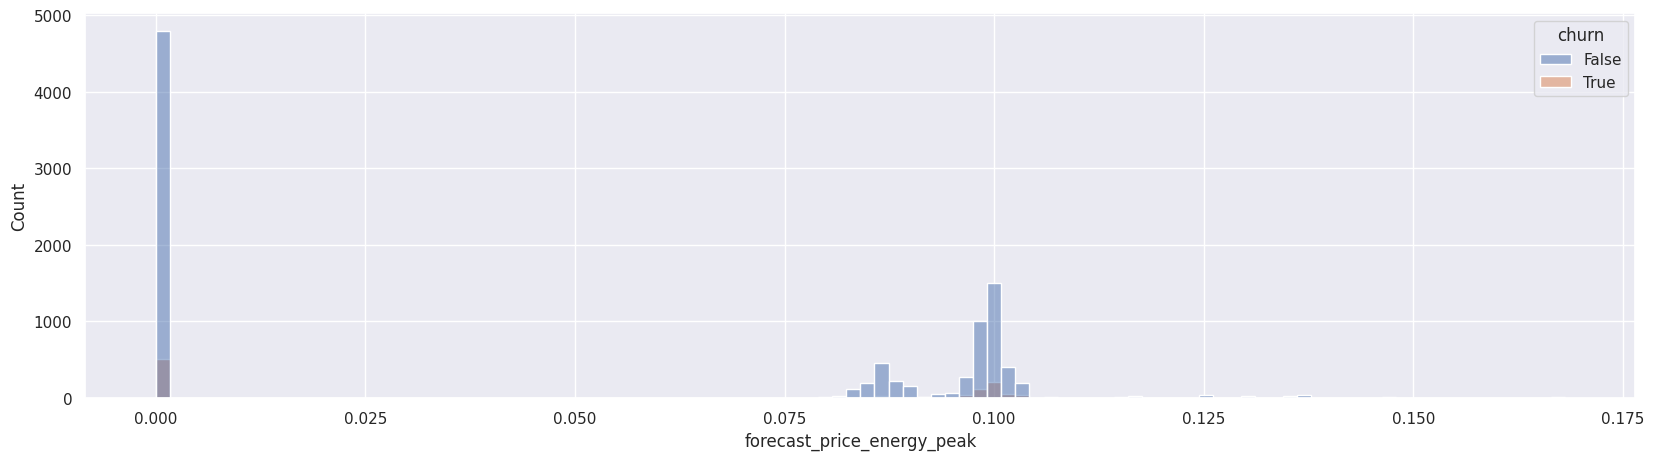

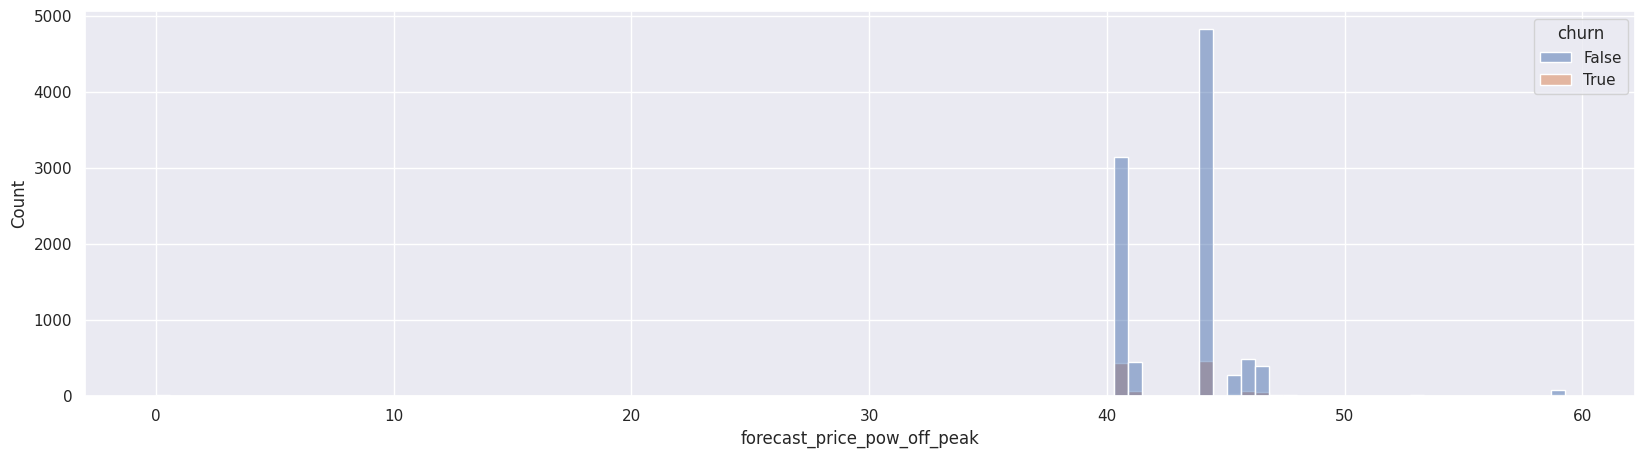

In [40]:
# Plot histograms for price features

for attr in ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',]:
    plot_histogram_by_churn(df=client_clean, target_variable=attr)

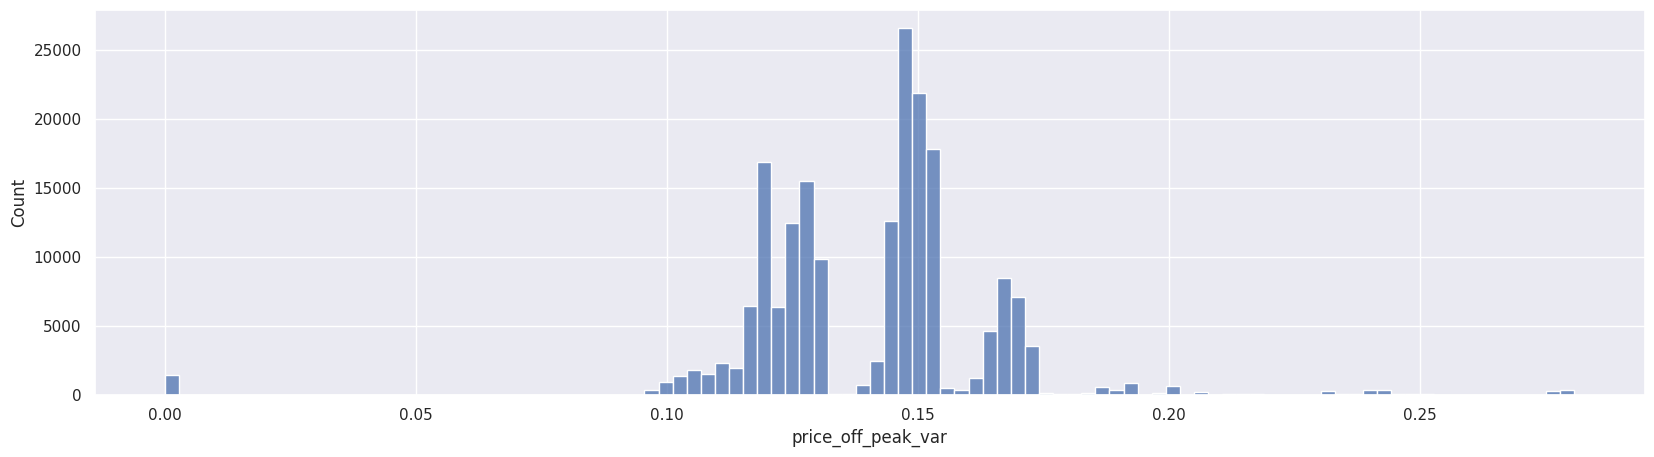

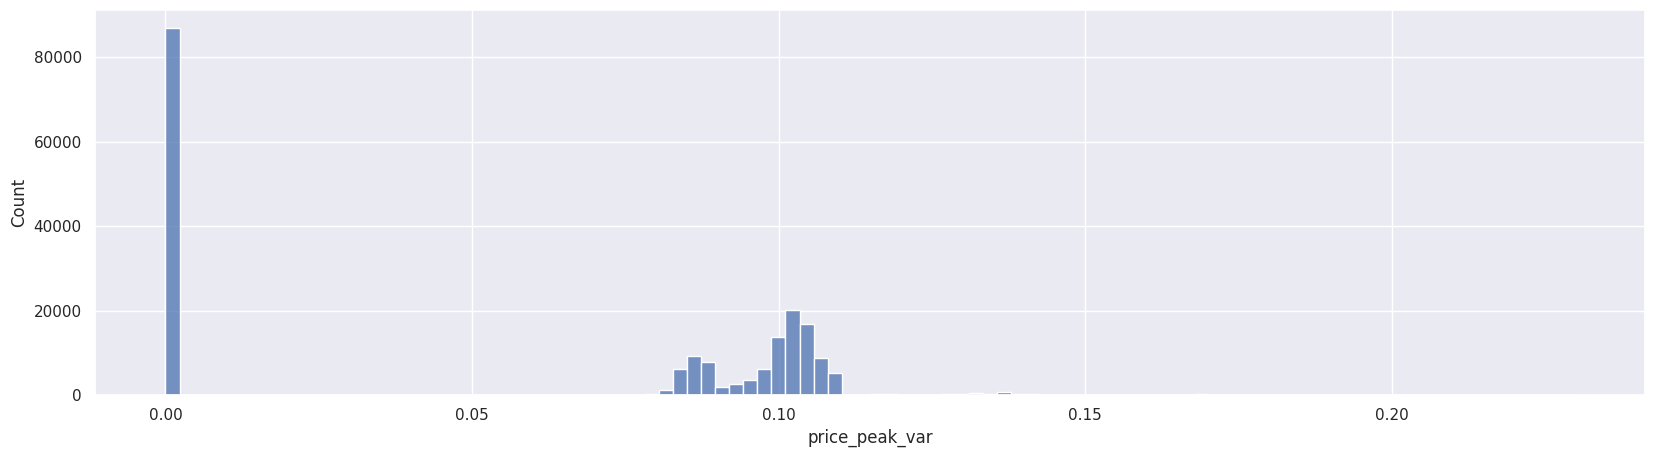

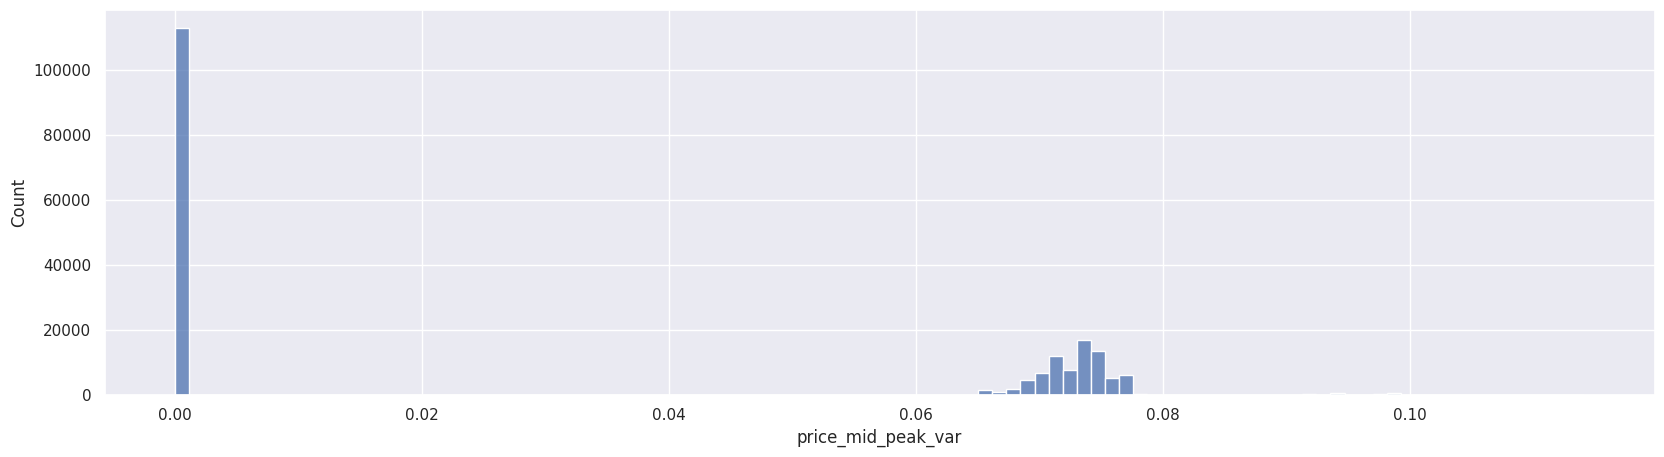

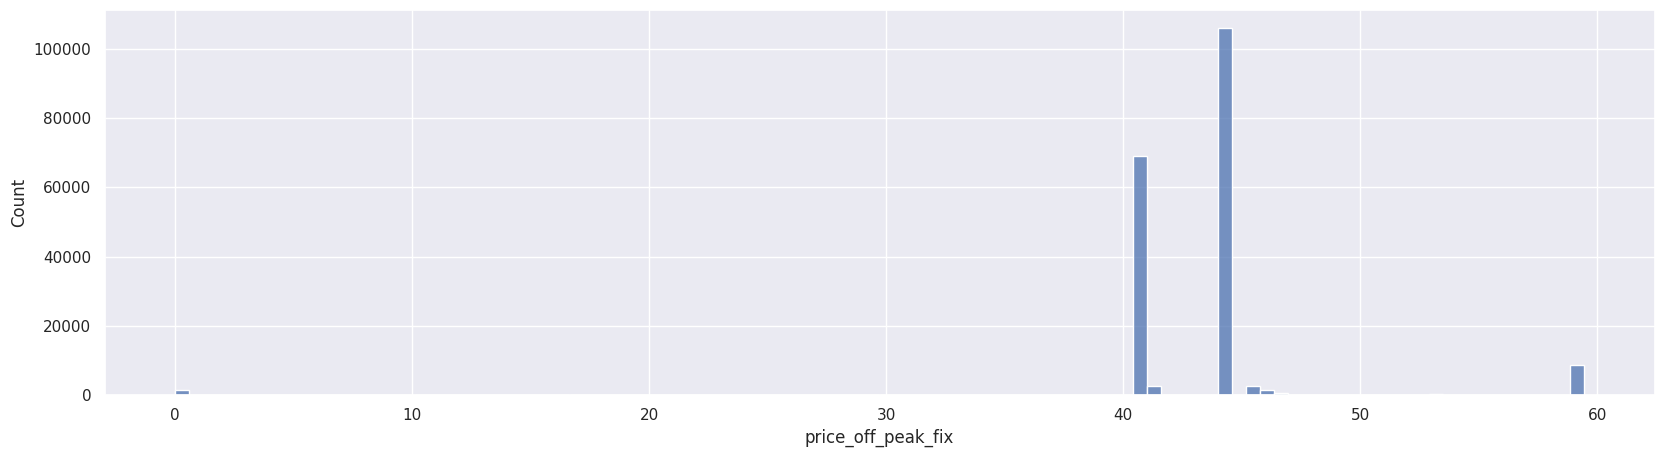

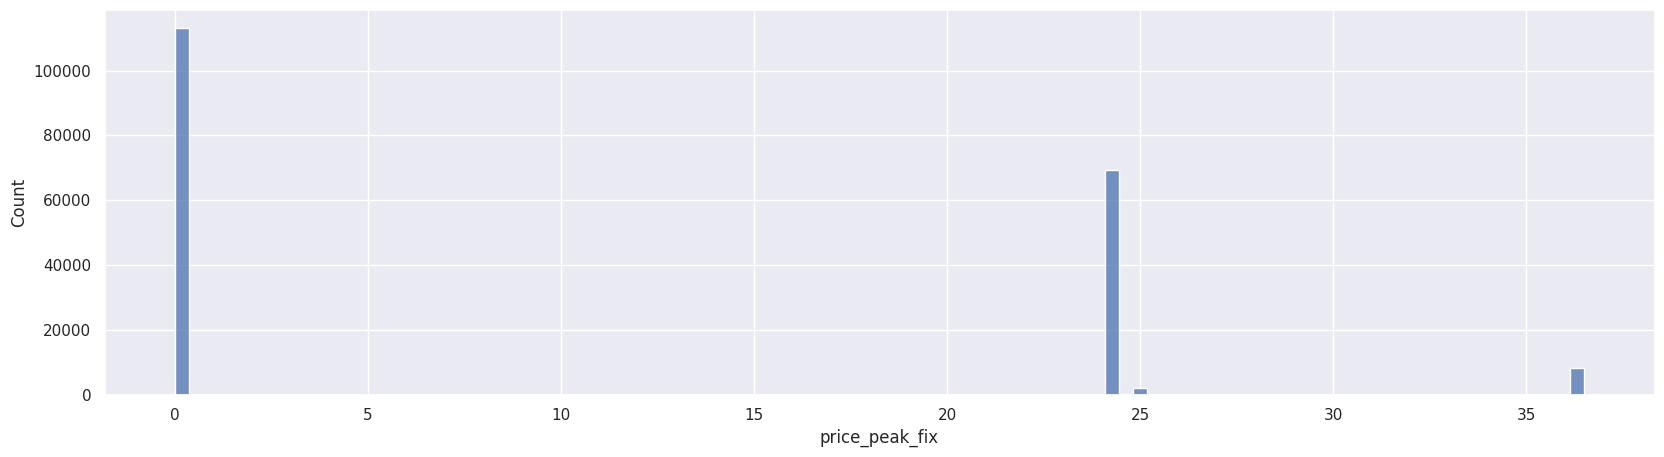

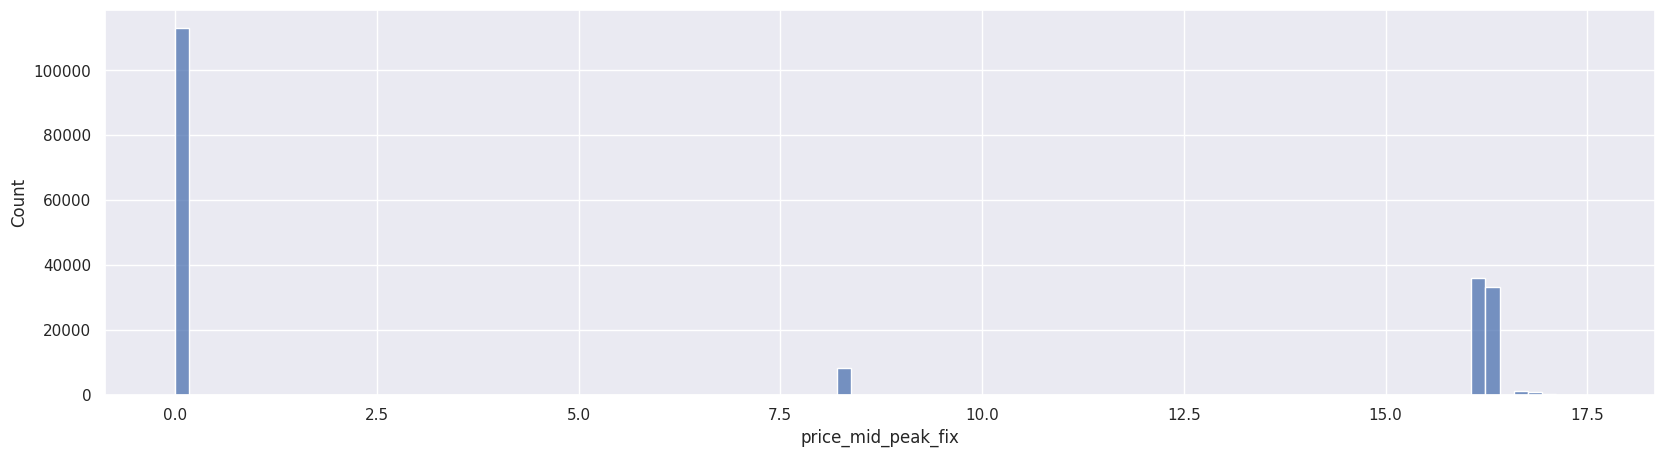

In [41]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_clean, target_variable=attr, if_churn=False)

Now let's examine how customers respond to price changes. Typically, if customers switch providers in response to price increases while other factors remain constant, we can infer that these customers are price-sensitive, as the price hike leads to churn. However, if customers switch providers despite a price decrease or no change, it's less conclusive to attribute their behavior solely to price sensitivity.

In [42]:
# Calculate maximum, minimum and average prices over the year
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_clean.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
# Megring client dataset to the above acquired dataset to inspect churn data

price_stat = price_stat.merge(client_clean[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,False
1,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,False
2,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.266931,44.266930,44.266930,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,False


In [44]:
# Calculate the changes in prices over the whole year

for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,False,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000
2,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.266931,44.266930,44.266930,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.004462,0.000000,0.000000,0.000001,0.000000,0.000000


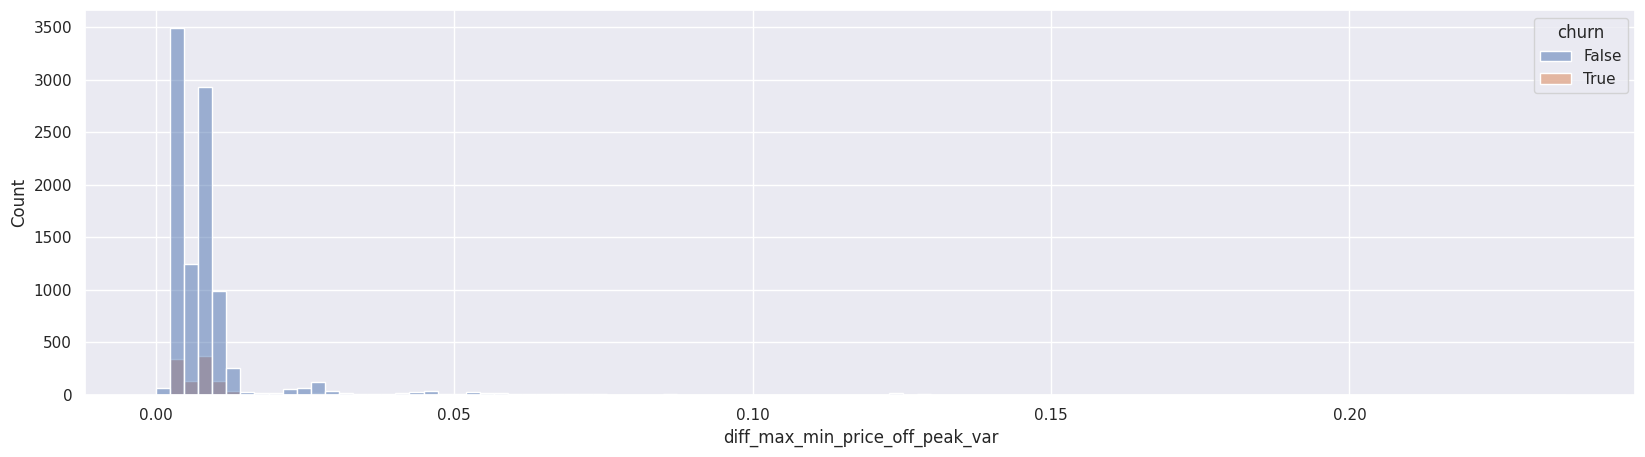

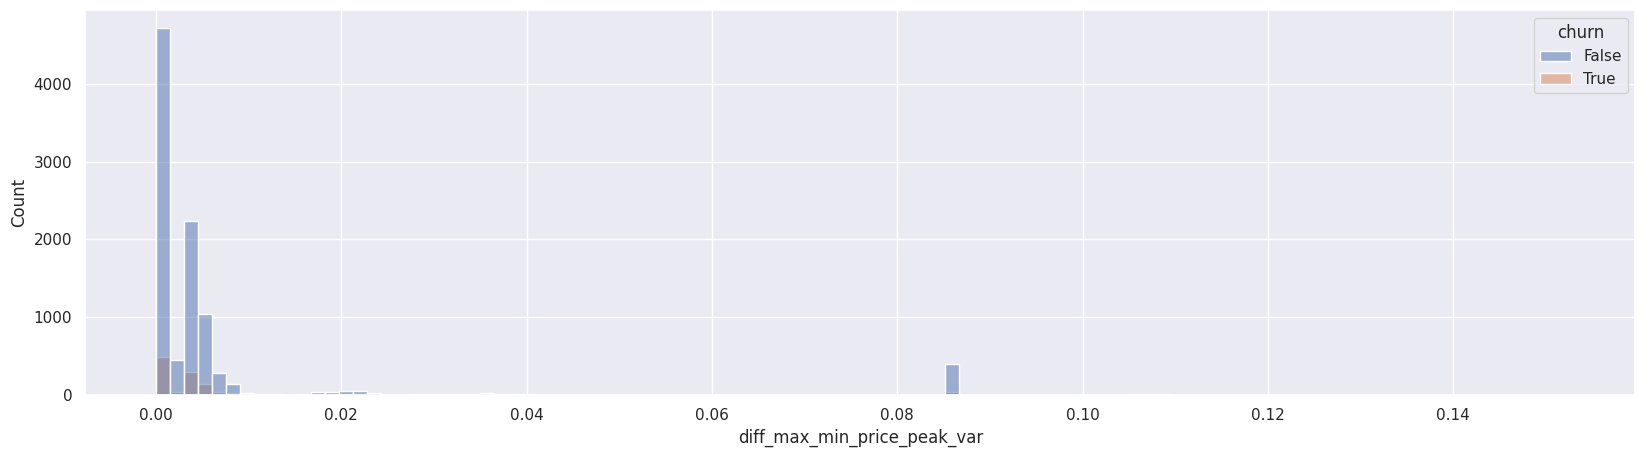

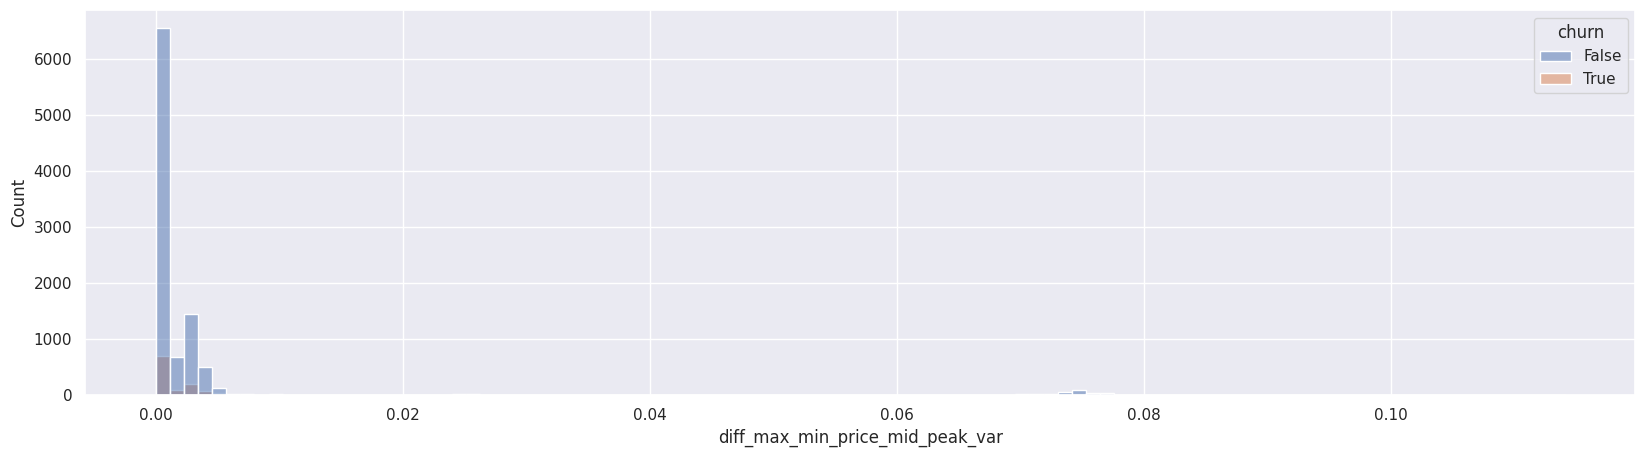

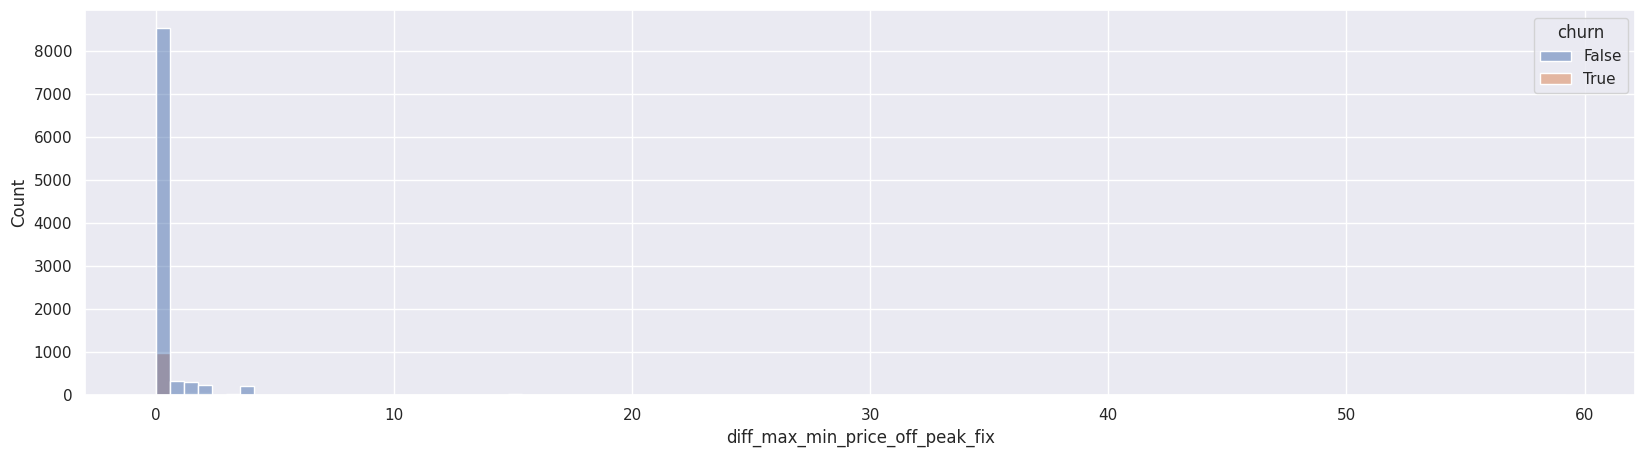

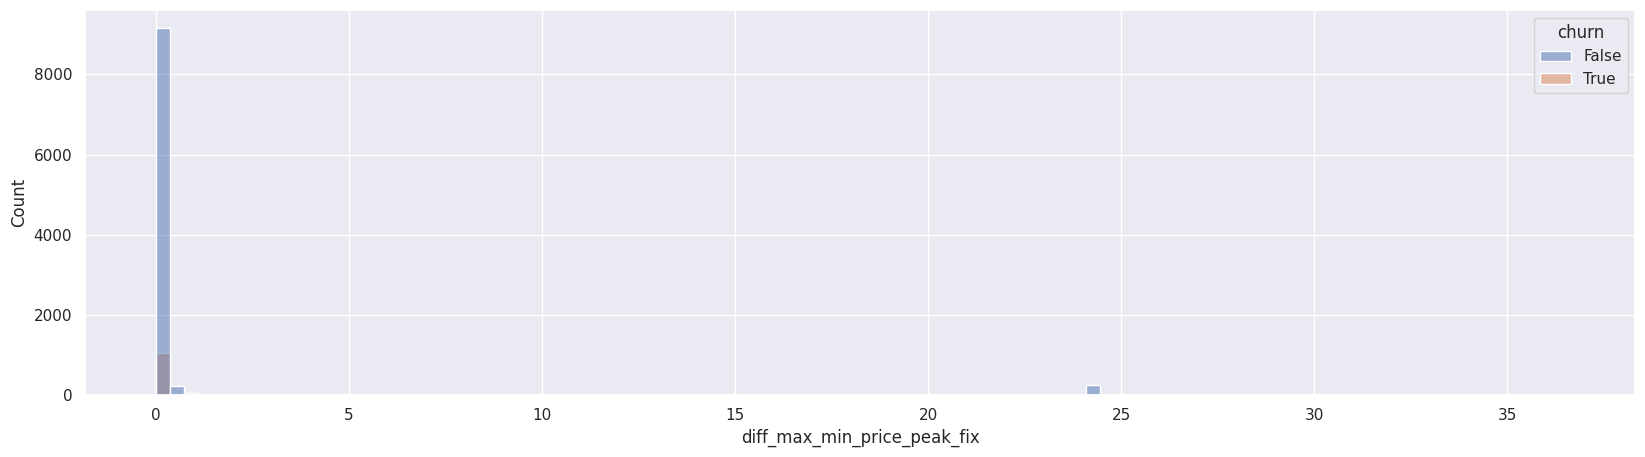

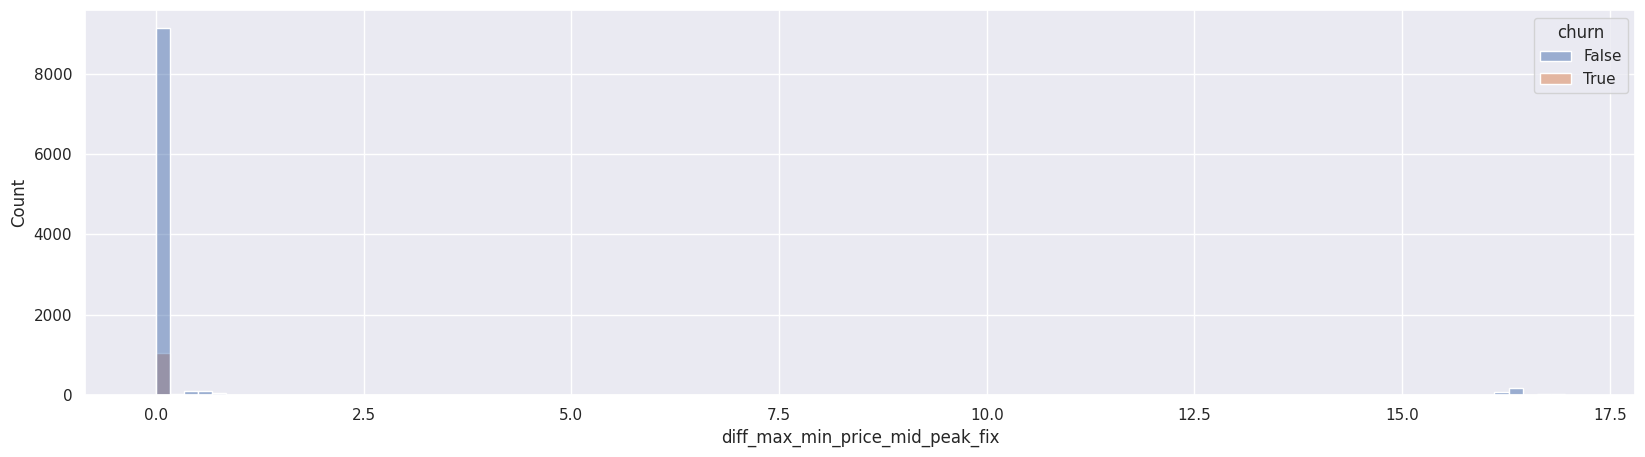

In [45]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

Most customers experienced relatively stable prices, with minimal fluctuations observed across various price metrics.

In [46]:
# Calculate the difference between the price last month (2015-12-01) and mean price.

for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price_clean[price_clean['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,False,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166,0.021521,-0.103794,-0.073160,3.742978,-24.421038,-16.280694
1,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000,-0.062803,0.101071,0.075096,-4.590825,24.437330,16.291555
2,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.266931,44.266930,44.266930,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.004462,0.000000,0.000000,0.000001,0.000000,0.000000,-0.003983,0.000000,0.000000,0.177780,0.000000,0.000000


The prices recorded for most customers in the last month closely resembled the average prices observed throughout the entire year.

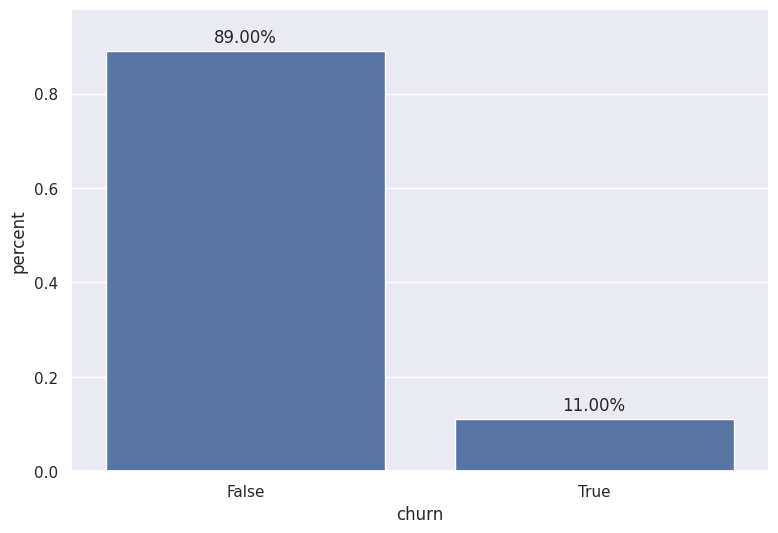

In [47]:
# Check whether changes in prices would affect customer churn (only considering off peak prices)

plot_bars(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)


Around 11% of customers who experienced an increase in off-peak energy prices decided to switch providers.

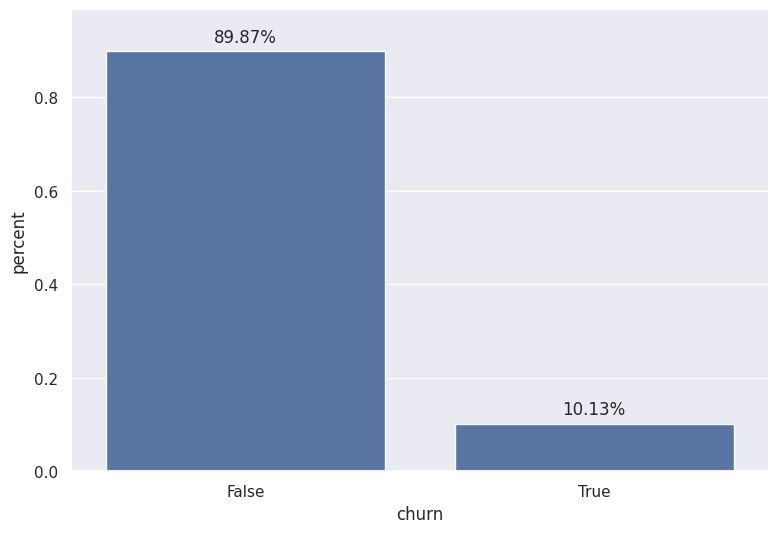

In [48]:
plot_bars(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

Around 10.13% of customers who did not experience an increase in off-peak energy prices, either due to a decrease or no change, also decided to switch providers.

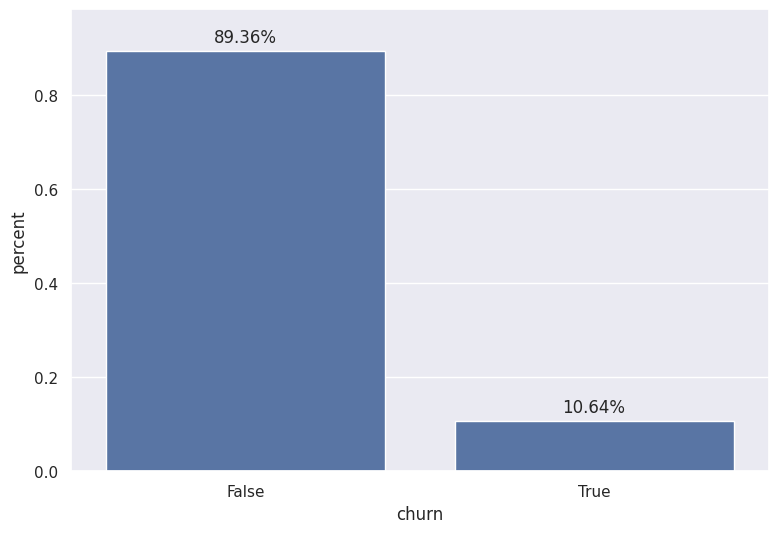

In [49]:
plot_bars(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

Approximately 10.64% of customers, whose off-peak power prices increased, opted to switch providers.

In [50]:
# Compare prices of December with average prices of the last 6 months and 3 months.

price_stat_6_month = price_clean[price_clean['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# Flatten column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0), price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()
# Add churn values
price_stat_6_month = price_stat_6_month.merge(client_clean[['id','churn']], on=['id'], how='left')
# Drop ids that are not inclued in the price dataset
price_stat_6_month = price_stat_6_month.dropna(subset=['churn']).reset_index(drop=True)
# Add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = price_clean[price_clean['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_6_month[f'{attr}_mean']
price_stat_6_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,False,0.024593,3.715825
1,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,False,-0.083269,-5.215825
2,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,False,-0.002241,0.177780
3,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,False,-0.005413,0.000000
4,00184e957277eeef733a7b563fdabd06,0.149555,0.145093,0.145837,44.266930,44.266930,44.266930,False,0.001763,0.177780


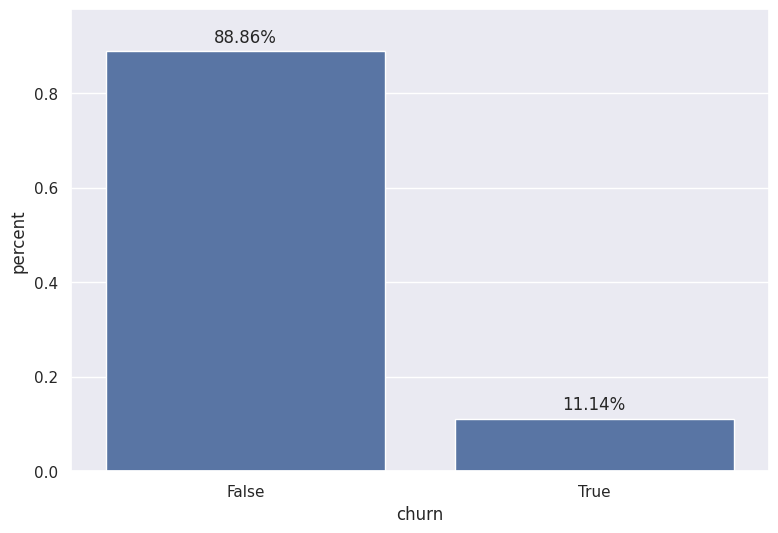

In [51]:
plot_bars(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

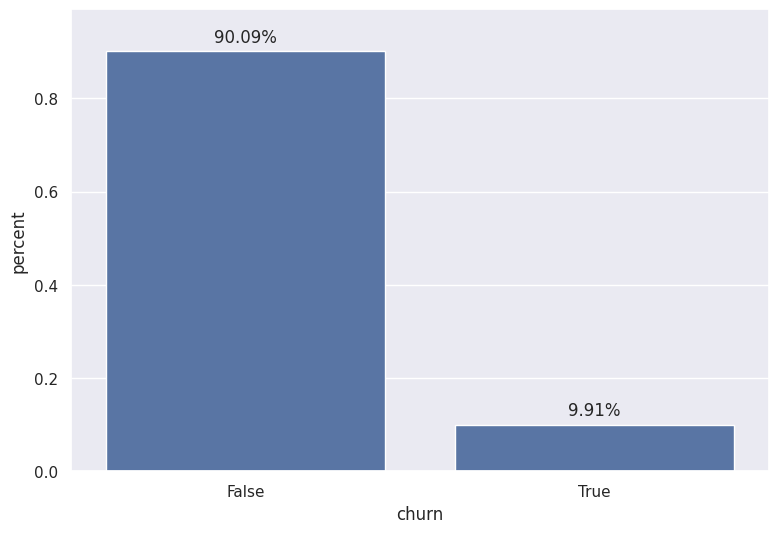

In [52]:
plot_bars(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

There seems to be a slight increase in churn when there are increases in off-peak prices, both in terms of price variation and fixed prices. However, the difference is not substantial.
The comparison of December prices with the average prices of the previous months shows a similar trend, with a slightly higher churn rate observed when there is an increase in off-peak price variation.
In summary, while there appears to be some relationship between price changes (specifically off-peak prices) and churn rates, it's not a dominant factor, and other variables may also play significant roles in influencing customer churn.

In [53]:
client_clean.to_csv('client_clean.csv', index = False)
from google.colab import files

files.download('client_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>